In [13]:
#Exercise 1 (part 1)

def read_csv_file(input):
    '''this function uses dictreader to create an object that operates like a regular reader but maps the information in each row to a dictionary; the for loop adds the data from the csv file to an empty list - to be used later in calculations'''
    file_path = input("Enter the path to the CSV file: ") 
    records = [] 
    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            records.append(row)

In [14]:
#Exercise 1 (part 2)

def average_grade_calculator(records):
    '''this function takes as input the records that were read earlier: it sums the (transformed float) data from the records list in the grade column, and divide by the length of the list to then print the average grade'''
    total = sum(float(record['Grade']) for record in records)
    average = total / len(records)
    return average

In [15]:
#Exercise 1 (part 3)

def filtering_function(records):
    '''this function uses the entire row in the records list to filter students who got a grade above 80, and then prints for each 'filtered' entry the name and grade'''
    filtered_records = [record for record in records if float(record['Grade']) >= 80.0]
    print("Student Report")
    print("--------------")
    for record in filtered_records:
        print(f"Name: {record['Name']}")
        print(f"Grade: {record['Grade']}")
        print("--------------------")

In [16]:
#Exercise 2 (part 1) - generating a sequence

def a(order,c):
    '''this function generates the number that is asked for in the input: the 'order'th mandelbrot number with the constant c specified'''
    if order==0:
        return 0 #this is a given
    elif order==1:
        return c #this is used to initialize other mandelbrot numbers, so the order input needs to be an integer strictly higher than 1
    else:
        return a(order-1,c)**2+c

#checking
for order in range(10):
    print(a(order, c=1))


0
1
2
5
26
677
458330
210066388901
44127887745906175987802
1947270476915296449559703445493848930452791205


In [17]:
#Exercise 2 (part 2) - checking to see if numbers satisfy mandelbrot condition

#we assume the sequence diverges to infinity if abs(a) is more than 2
def check_mandelbrot(c):
    truth=1
    for order in range (10):
        #print(a(order,c)) #this is a nice way to check by hand if the sequence diverges, but in the end the boolean value also gives the answer
        if abs(a(order,c))>2:
            truth=0
            break
    return truth==1

#checking
print(f'for -1: {check_mandelbrot(-1)}, \n for 0: {check_mandelbrot(0)}, \n for 1: {check_mandelbrot(1)}')

for -1: True, 
 for 0: True, 
 for 1: False


In [57]:
#Exercise 2 (part 3) - plotting the numbers that satisfy mandelbrot condition

def draw_mandel(width):
    '''this function creates a meshgrid of the two domains given for the axes, then checks for mandelbrot numbers in the interval and plots them'''
    x_domain=np.linspace(-1.5,0.5,width)
    y_domain=np.linspace(-1,1,width)

    mandelbrot_set=[]
    for y in y_domain.tolist():
        for x in x_domain.tolist():
            c=complex(x,y)
            if check_mandelbrot(c)==True:
                mandelbrot_set.append(c)

    #plt.scatter (mandelbrot_set.real, mandelbrot_set.imag)
    plt.pcolormesh(x_domain, y_domain, mandelbrot_set, cmap = 'black')
    plt.xlabel("real axis")
    plt.ylabel("imaginary axis")
    plt.show()

draw_mandel(200)

AttributeError: 'list' object has no attribute 'real'

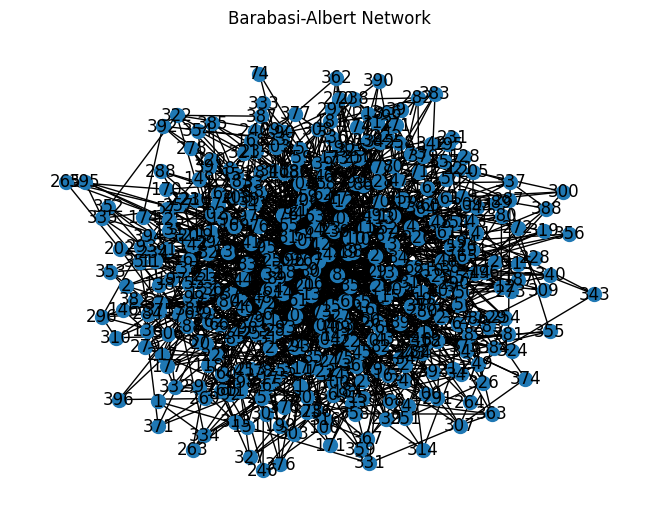

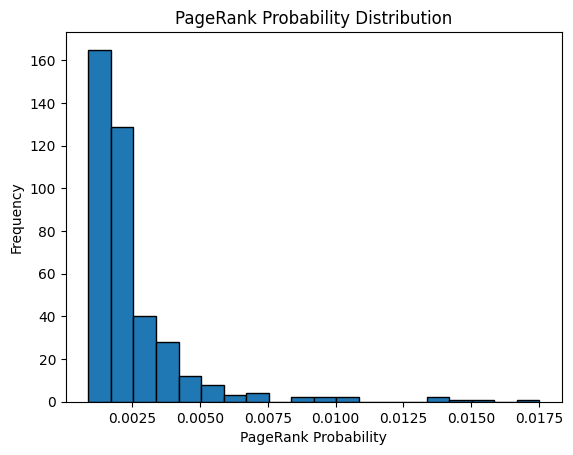

In [9]:
#Exercise 3.1 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def generate_network(n0, N, M):
    """ This function will create the barabasi-albert network by creating 
    an initial graph and then adding links and nodes to the graph"""
    graph = nx.Graph()
    for i in range(1,n0):
        graph.add_edge(0, i)

    #now create the network 
    for j in range(n0, N):
        degrees = [graph.degree(node) for node in graph.nodes()]
        total_degree = sum (degrees)
        probability = [degree / total_degree for degree in degrees]
        
        #randomely select nodes to link to from initial point 
        nodes_selected = np.random.choice(graph.nodes(), size = M, p = probability)

        #now add the randomly selected nodes to the link
        graph.add_node(j)
        for node in nodes_selected:
            graph.add_edge(j, node)

    return graph

def pagerank_visualisation(graph, alpha=0.85):
    """Function to calculate PageRank and visualize the network"""

    # Calculate PageRank
    pagerank = nx.pagerank(graph, alpha=alpha)
    
    # Visualize the network
    net = nx.spring_layout(graph)
    nx.draw(graph, net, with_labels=True, node_size=100)
    plt.title("Barabasi-Albert Network")
    plt.show()
    
    # Visualize the distribution of PageRank probabilities
    plt.hist(list(pagerank.values()), bins=20, edgecolor='k')
    plt.xlabel("PageRank Probability")
    plt.ylabel("Frequency")
    plt.title("PageRank Probability Distribution")
    plt.show()
    
    return pagerank

# Parameters
n0 = 5  # Initial nodes
N = 400  # Total number of webpages
M = 4    # Number of pages each new webpage links to

# Generate the Barabasi-Albert network
web_network = generate_network(n0, N, M)

# Calculate and visualize PageRank
pagerank_probabilities = pagerank_visualisation(web_network)


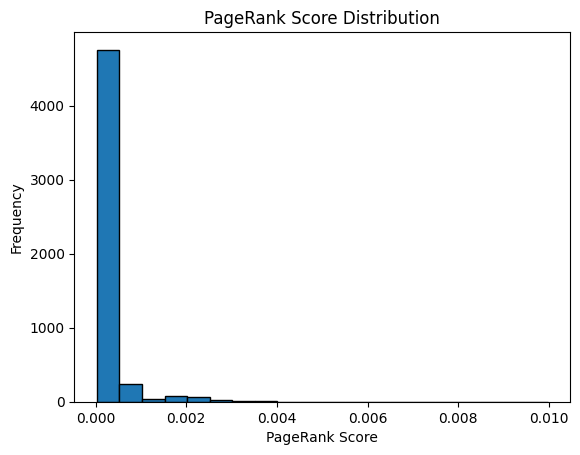

In [12]:
#Exercise 3.2 

import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('squirrel_edges.csv')

# Create a graph 
graph = nx.DiGraph()

# Add edges from the DataFrame
edges = [(column1, column2) for column1, column2 in zip(df['id1'], df['id2'])]
graph.add_edges_from(edges)

def calculate_pagerank(G, alpha=0.85, iterations=100, tolerance=1e-6):
    """This functionn will calculate the pagerank scores and create a list for the distribution"""
    nr_nodes = len(G)
    pagerank = {node: 1 / nr_nodes for node in graph.nodes()}
    
    for i in range(iterations):
        new_pagerank = {}
        for node in graph.nodes():
            new_pagerank[node] = (1 - alpha) / nr_nodes
            sum_pagerank = 0
            for j in graph.predecessors(node):
                sum_pagerank += pagerank[j] / len(list(graph.neighbors(j)))
            new_pagerank[node] += alpha * sum_pagerank
        
        # Checking for convergence (max differnece cant be smaller than tollerance)
        max_diff = max(abs(new_pagerank[node] - pagerank[node]) for node in graph.nodes())
        if max_diff < tolerance:
            break
        
        pagerank = new_pagerank
    
    return pagerank

# Calculate PageRank
pagerank_scores = calculate_pagerank(graph)

# Visualize the distribution 
plt.hist(list(pagerank_scores.values()), bins=20, edgecolor='k')
plt.xlabel("PageRank Score")
plt.ylabel("Frequency")
plt.title("PageRank Score Distribution")
plt.show()
